## 1번


In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2번

In [4]:
iris.groupby('species')['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [5]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## 3번

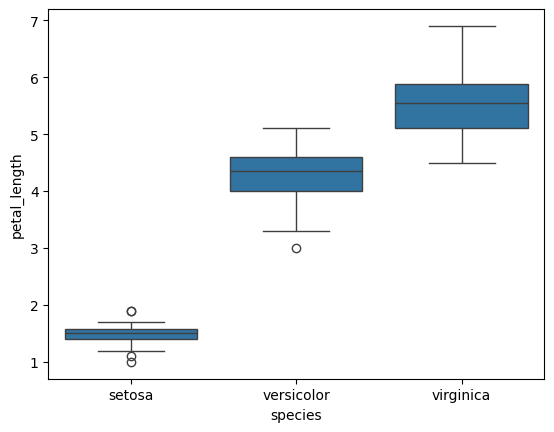

In [10]:
import matplotlib.pyplot as plt

sns.boxplot(x='species', y='petal_length', data=iris)
plt.show()

## 4번

In [6]:
from scipy.stats import shapiro

for s in iris['species'].unique():
    stat, p = shapiro(iris[iris['species'] == s]['petal_length'])
    print(s, p)


setosa 0.0548114671955363
versicolor 0.15847783815657573
virginica 0.10977536903223506


## 5번

In [10]:
from scipy.stats import levene

stat, p = levene(
    iris[iris["species"] == "setosa"]["petal_length"],
    iris[iris["species"] == "versicolor"]["petal_length"],
    iris[iris["species"] == "virginica"]["petal_length"]
)

print(p)


3.1287566394085397e-08


## 6번

$H_0 $: 세 species 간 petal_length의 평균은 모두 같다. 
$H_1 $: 적어도 한 species의 petal_length 평균은 서로 다르다.

## 7번

In [13]:
from scipy.stats import f_oneway

stat, p = f_oneway(
    iris[iris["species"] == "setosa"]["petal_length"],
    iris[iris["species"] == "versicolor"]["petal_length"],
    iris[iris["species"] == "virginica"]["petal_length"]
)

print(stat, p)


1180.161182252976 2.8567766109624403e-91


## 8번

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=iris["petal_length"],
    groups=iris["species"],
    alpha=0.05
)

print(tukey)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


## 10번

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = iris[["sepal_length", "sepal_width", "petal_width"]]
y = iris["petal_length"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred), model.coef_


(0.1300162603138268,
 0.9603293155857664,
 array([ 0.72281463, -0.63581649,  1.46752403]))